In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
def standardize(column):
    return (column - column.mean()) / column.std()

def apply(X):
    cols=list(X)
    for i in cols:
        X[i]=standardize(X[i])

In [3]:
df = pd.read_csv('synthetic_dataset.csv')
df = df.set_index('Unnamed: 0')
X = df.drop(['Outcome'],axis = 1)
y = df['Outcome']
X_train, X_test,y_train, y_test = train_test_split(X, y ,random_state=101, test_size=0.3, shuffle=True)
apply(X_train)
apply(X_test)

In [8]:
class Model:
    t = []    #vector of target values
    X = []    #input matrix
    w = []    #weight vector
    predictions = []    #list of predicted values 
    
    def __init__(self,X,t,epochs=500,alpha=0.01):    #constructor to initialize all variables
        import numpy as np
        self.t = t
        self.X = np.hstack(((np.ones((X.shape[0],1))),X))
        self.predictions = []
        self.epochs = epochs
        self.alpha = alpha #learning rate 0.001
        self.w = np.zeros((self.X.shape[1]))    #initializing the weights with a value of 0
        self.losses = []
    
    def calc_loss(self, X):
        sum = 0
        for x in X:
            sum+=x**2
        return sum
    
    def fit(self):    #adjusting the weights using batch gradient descent method
        import numpy as np
        gradJ = np.dot(np.dot( self.X.transpose(),self.X ),self.w) - np.dot(self.X.transpose(),self.t)    #gradient vector for the cost function(assumed to be SSE)
        while (self.epochs>0):    #while the gradient is outside the range (min_threshhold,max_threshhold)
            self.epochs-=1
            self.losses.append(self.calc_loss(np.dot(self.X, self.w)-self.t))
            self.w = self.w - self.alpha*gradJ
            gradJ = np.dot(np.dot(self.X.transpose(),self.X),self.w)-np.dot(self.X.transpose(),self.t)
            
    def predict(self,x_test):    #finding the output value calculated by multiplying the x_test matrix with the weight vector
        import numpy as np
        x_test1 = np.hstack( ((np.ones((x_test.shape[0],1))),x_test) )
        for x in x_test1:
            self.predictions.append(np.dot(x,self.w))
        return self.predictions
    
    def loss_plot(self):
        x = list(range(1,len(self.losses)+1))
        y = self.losses
        plt.plot(x, y)
        plt.show()

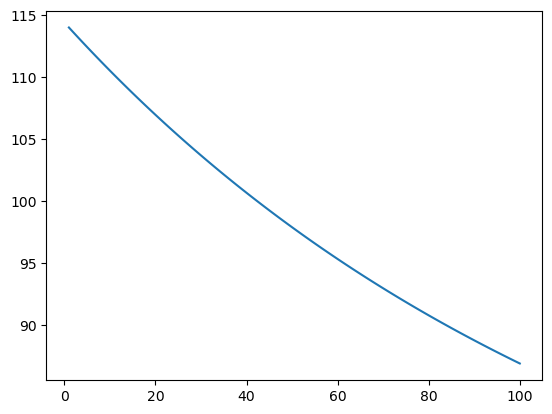

In [11]:
myModel = Model(X_train,y_train,100,0.00001)
model = LinearRegression()
myModel.fit()
model.fit(X_train,y_train)
myModel.loss_plot()

sklearn: 0.41460863629860056 myModel: 0.5044729584518344


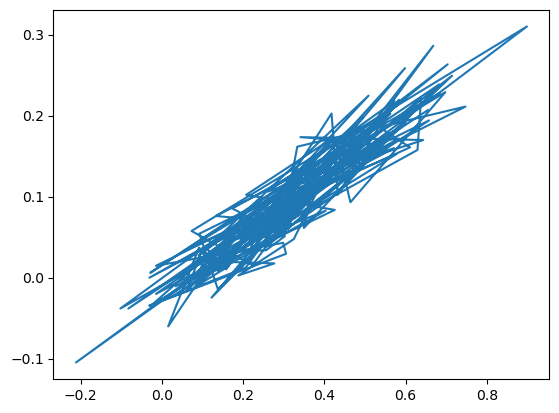

In [16]:
myPredictions = myModel.predict(X_test)
predictions = model.predict(X_test)
plt.plot(predictions,myPredictions)
print(f"sklearn: {np.sqrt(mean_squared_error(y_test, predictions))} myModel: {np.sqrt(mean_squared_error(y_test, myPredictions))}")

In [9]:
def discriminant(x):
    if x<0.5:
        return 0
    return 1

In [9]:
vectorized_discriminant = np.vectorize(discriminant)
rounded_predictions = vectorized_discriminant(predictions)
rounded_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [10]:
print(classification_report(y_test, rounded_predictions, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.77      0.91      0.83        99
     class 1       0.73      0.47      0.57        51

    accuracy                           0.76       150
   macro avg       0.75      0.69      0.70       150
weighted avg       0.75      0.76      0.74       150



In [11]:
rounded_mypredictions = vectorized_discriminant(predictions)
rounded_mypredictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [12]:
print(classification_report(y_test, rounded_mypredictions, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.77      0.91      0.83        99
     class 1       0.73      0.47      0.57        51

    accuracy                           0.76       150
   macro avg       0.75      0.69      0.70       150
weighted avg       0.75      0.76      0.74       150



In [13]:
print(confusion_matrix(y_test,rounded_mypredictions))

[[90  9]
 [27 24]]
